## **2.3 Feature Selection – Importance, RFE, Chi-Square**


**Import required tools**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.model_selection import train_test_split

**Feature Importance with Random Forest**

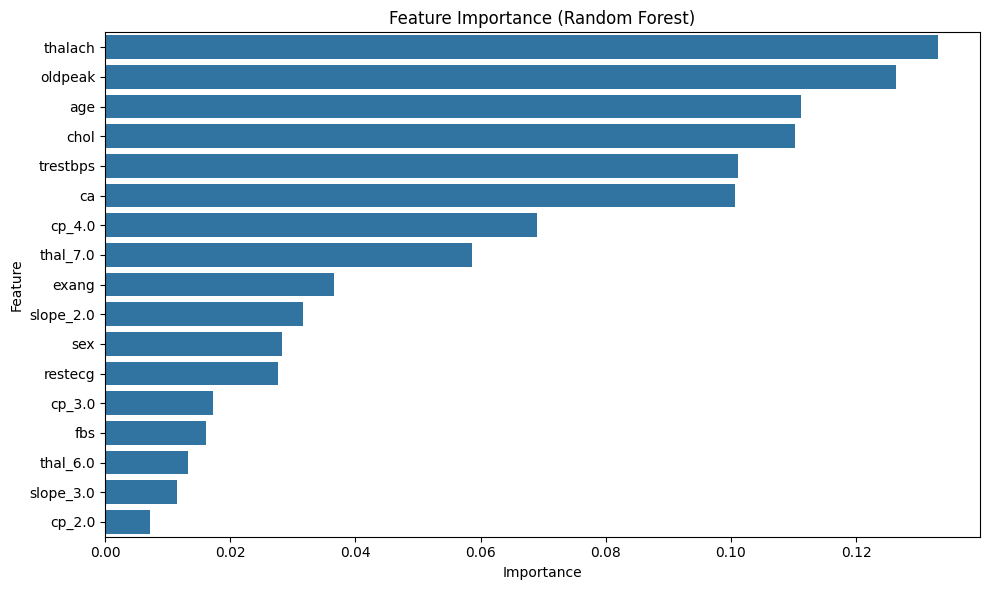

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled_df, y)

importances = rf.feature_importances_
feature_names = X_scaled_df.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

**Recursive Feature Elimination (RFE)**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=8)
rfe.fit(X_scaled_df, y)

selected_rfe = X_scaled_df.columns[rfe.support_]
print("RFE selected features:", list(selected_rfe))

RFE selected features: ['sex', 'restecg', 'thalach', 'oldpeak', 'ca', 'cp_4.0', 'thal_7.0', 'slope_2.0']


**Chi-Square Test (good for categorical features, requires positive values)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Rescale to [0,1] for chi2
X_minmax = MinMaxScaler().fit_transform(X_scaled_df)

chi_selector = SelectKBest(score_func=chi2, k=8)
chi_selector.fit(X_minmax, y)
selected_chi = X_scaled_df.columns[chi_selector.get_support()]
print("Chi-Square selected features:", list(selected_chi))

Chi-Square selected features: ['exang', 'oldpeak', 'ca', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'thal_7.0', 'slope_2.0']


### ✅ Deliverables:

- Plot of feature importances
- Top N features selected by:
  - ✅ Random Forest Importance
  - ✅ RFE
  - ✅ Chi-Square Test

You can now use these selected features in later modeling steps!

**Next Step:** 2.4 Supervised Learning – Classification Models
